# Knacksack Problem



In [13]:
import numpy as np

In [14]:

class Knapsack01Problem:
    """This class encapsulates the Knapsack 0-1 Problem from RosettaCode.org
    """

    def __init__(self):

        # initialize instance variables:
        self.items = []
        self.maxCapacity = 0

        # initialize the data:
        self.__initData()

    def __len__(self):
        """
        :return: the total number of items defined in the problem
        """
        return len(self.items)

    def __initData(self):
        """initializes the RosettaCode.org knapsack 0-1 problem data
        """
        self.items = [
            ("map", 9, 150),
            ("compass", 13, 35),
            ("water", 153, 200),
            ("sandwich", 50, 160),
            ("glucose", 15, 60),
            ("tin", 68, 45),
            ("banana", 27, 60),
            ("apple", 39, 40),
            ("cheese", 23, 30),
            ("beer", 52, 10),
            ("suntan cream", 11, 70),
            ("camera", 32, 30),
            ("t-shirt", 24, 15),
            ("trousers", 48, 10),
            ("umbrella", 73, 40),
            ("waterproof trousers", 42, 70),
            ("waterproof overclothes", 43, 75),
            ("note-case", 22, 80),
            ("sunglasses", 7, 20),
            ("towel", 18, 12),
            ("socks", 4, 50),
            ("book", 30, 10)
        ]

        self.maxCapacity = 400

    def getValue(self, zeroOneList):
        """
        Calculates the value of the selected items in the list, while ignoring items that will cause the accumulating weight to exceed the maximum weight
        :param zeroOneList: a list of 0/1 values corresponding to the list of the problem's items. '1' means that item was selected.
        :return: the calculated value
        """

        totalWeight = totalValue = 0

        for i in range(len(zeroOneList)):
            item, weight, value = self.items[i]
            if totalWeight + weight <= self.maxCapacity:
                totalWeight += zeroOneList[i] * weight
                totalValue += zeroOneList[i] * value
        return totalValue

    def printItems(self, zeroOneList):
        """
        Prints the selected items in the list, while ignoring items that will cause the accumulating weight to exceed the maximum weight
        :param zeroOneList: a list of 0/1 values corresponding to the list of the problem's items. '1' means that item was selected.
        """
        totalWeight = totalValue = 0

        for i in range(len(zeroOneList)):
            item, weight, value = self.items[i]
            if totalWeight + weight <= self.maxCapacity:
                if zeroOneList[i] > 0:
                    totalWeight += weight
                    totalValue += value
                    print("- Adding {}: weight = {}, value = {}, accumulated weight = {}, accumulated value = {}".format(item, weight, value, totalWeight, totalValue))
        print("- Total weight = {}, Total value = {}".format(totalWeight, totalValue))
        
        


In [15]:
# create a problem instance:
knapsack = Knapsack01Problem()

# creaete a random solution and evaluate it:
randomSolution = np.random.randint(2, size=len(knapsack))
print("Random Solution = ")
print(randomSolution)
knapsack.printItems(randomSolution)

Random Solution = 
[0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1]
- Adding water: weight = 153, value = 200, accumulated weight = 153, accumulated value = 200
- Adding glucose: weight = 15, value = 60, accumulated weight = 168, accumulated value = 260
- Adding banana: weight = 27, value = 60, accumulated weight = 195, accumulated value = 320
- Adding apple: weight = 39, value = 40, accumulated weight = 234, accumulated value = 360
- Adding cheese: weight = 23, value = 30, accumulated weight = 257, accumulated value = 390
- Adding camera: weight = 32, value = 30, accumulated weight = 289, accumulated value = 420
- Adding towel: weight = 18, value = 12, accumulated weight = 307, accumulated value = 432
- Adding socks: weight = 4, value = 50, accumulated weight = 311, accumulated value = 482
- Adding book: weight = 30, value = 10, accumulated weight = 341, accumulated value = 492
- Total weight = 341, Total value = 492


In [17]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import numpy

import matplotlib.pyplot as plt
import seaborn as sns

import knapsack


In [18]:

# problem constants:
# create the knapsack problem instance to be used:
knapsack = knapsack.Knapsack01Problem()

# Genetic Algorithm constants:
POPULATION_SIZE = 50
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 1


# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [19]:

toolbox = base.Toolbox()
# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)


In [20]:

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, len(knapsack))

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


c:\Python310\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Python310\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [25]:


# fitness calculation
def knapsackValue(individual):
    return knapsack.getValue(individual),  # return a tuple


toolbox.register("evaluate", knapsackValue)

In [26]:
# genetic operators:mutFlipBit

# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selTournament, tournsize=3)

# Single-point crossover:
toolbox.register("mate", tools.cxTwoPoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/len(knapsack))

In [27]:


# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", numpy.max)
stats.register("avg", numpy.mean)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# perform the Genetic Algorithm flow with hof feature added:
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                            ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)


gen	nevals	max	avg   
0  	50    	845	570.36
1  	43    	890	678.84
2  	50    	890	784.84
3  	48    	910	830.36
4  	48    	950	858.28
5  	50    	950	869.54
6  	46    	950	874.26
7  	46    	980	880.54
8  	48    	980	915.36
9  	49    	980	948.14
10 	43    	980	953.4 
11 	48    	985	958.78
12 	48    	985	969.54
13 	46    	997	973.68
14 	48    	997	975.42
15 	43    	997	972.92
16 	49    	997	979.88
17 	45    	997	987.82
18 	48    	1000	995.08
19 	48    	1000	991.62
20 	46    	1000	988.34
21 	47    	1000	988.5 
22 	49    	1000	989.68
23 	45    	1000	998.32
24 	46    	1000	999.28
25 	46    	1000	1000  
26 	41    	1000	996.24
27 	41    	1000	989.68
28 	40    	1000	992.2 
29 	48    	1000	989.48
30 	44    	1000	998.3 
31 	45    	1000	993.98
32 	44    	1000	990.14
33 	47    	1000	994.44
34 	43    	1000	994.9 
35 	46    	1000	990.24
36 	44    	1000	996.9 
37 	48    	1000	997.6 
38 	44    	1000	985.96
39 	43    	1000	997.7 
40 	50    	1000	994.44
41 	46    	1000	996.9 
42 	50    	1000	998.6 
43 	42 

-- Best Ever Individual =  [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0]
-- Best Ever Fitness =  1000.0
-- Knapsack Items = 
- Adding map: weight = 9, value = 150, accumulated weight = 9, accumulated value = 150
- Adding compass: weight = 13, value = 35, accumulated weight = 22, accumulated value = 185
- Adding water: weight = 153, value = 200, accumulated weight = 175, accumulated value = 385
- Adding sandwich: weight = 50, value = 160, accumulated weight = 225, accumulated value = 545
- Adding glucose: weight = 15, value = 60, accumulated weight = 240, accumulated value = 605
- Adding banana: weight = 27, value = 60, accumulated weight = 267, accumulated value = 665
- Adding cheese: weight = 23, value = 30, accumulated weight = 290, accumulated value = 695
- Adding suntan cream: weight = 11, value = 70, accumulated weight = 301, accumulated value = 765
- Adding t-shirt: weight = 24, value = 15, accumulated weight = 325, accumulated value = 780
- Adding waterproof

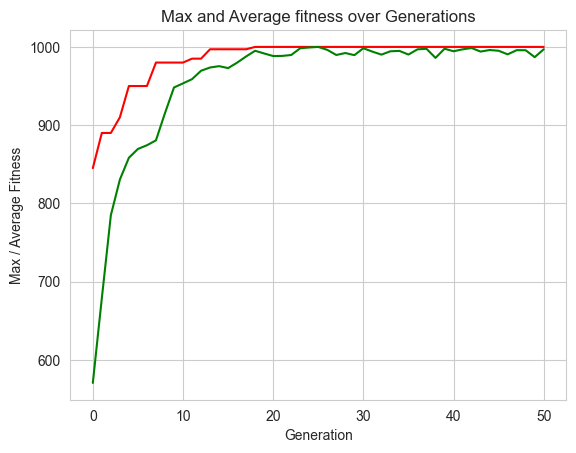

In [28]:

# print best solution found:
best = hof.items[0]
print("-- Best Ever Individual = ", best)
print("-- Best Ever Fitness = ", best.fitness.values[0])

print("-- Knapsack Items = ")
knapsack.printItems(best)

# extract statistics:
maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

# plot statistics:
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average fitness over Generations')
plt.show()
